In [1]:
import os
import sys
import subprocess
import signac
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statistics import linear_regression
from scipy.stats import linregress

In [2]:
def is_slope_zero(n, simulations_per_block, threshold=0.015):
    # Step 1: Divide the Data
    n_length = len(n)
    # print(f"Total number of data points: {n_length}")

    # Calculate the number of blocks
    m = n_length // simulations_per_block
    # print(f"Number of blocks: {m}")

    # Initialize averages list
    averages = []

    for i in range(m):
        start_index = i * simulations_per_block
        # Handle the last block to include all remaining elements
        end_index = n_length if i == m - 1 else (i + 1) * simulations_per_block
        # print(f"Block {i + 1}: Start index = {start_index}, End index = {end_index}")

        # Calculate the average of the current block
        section_average = np.mean(n[start_index:end_index])
        averages.append(section_average)

    # Step 2: Scale the Averages between 0 and 1
    scaler = StandardScaler()  # You can change to MinMaxScaler() if desired
    scaled_averages = scaler.fit_transform(np.array(averages).reshape(-1, 1)).flatten()

    # Step 3: Fit a Line with intercept fixed at 0
    x = np.arange(m)
    slope, intercept, r_value, p_value, std_err = linregress(x, scaled_averages)

    # Plotting
    plt.figure(figsize=(10, 6))

    # Original Data
    plt.subplot(1, 2, 1)
    plt.plot(scaler.transform(n.reshape(-1, 1)), label='Original Data', color='blue')
    
    # Draw vertical lines for each block average
    for i in range(m):
        # Calculate the x position scaled based on total number of data
        x_position = (i * simulations_per_block + (simulations_per_block / 2))  # Middle of the block
        plt.axvline(x=x_position, color='orange', linestyle='--', lw=0.7,
                    label=f'Block {i + 1} Average' if i == 0 else "")
    
    plt.title('Original Data')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()

    # Averages and Line of Best Fit
    plt.subplot(1, 2, 2)
    plt.scatter(x, scaled_averages, label='Block Averages', color='orange')
    
    # Plot the line of best fit with intercept fixed at 0
    plt.plot(x, slope * x + intercept, label='Line of Best Fit (Intercept = 0)', color='red')
    plt.title('Block Averages and Line of Best Fit')
    plt.xlabel('Block')
    plt.ylabel('Scaled Average')
    plt.axhline(y=0, color='k', linestyle='--', lw=0.7)  # y=0 line for reference
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Step 4: Check the Slope
    return slope, abs(slope) < threshold

ID b1daf847aa503f9b9d6a83c45b6bedf7 AT 1 T 140.0


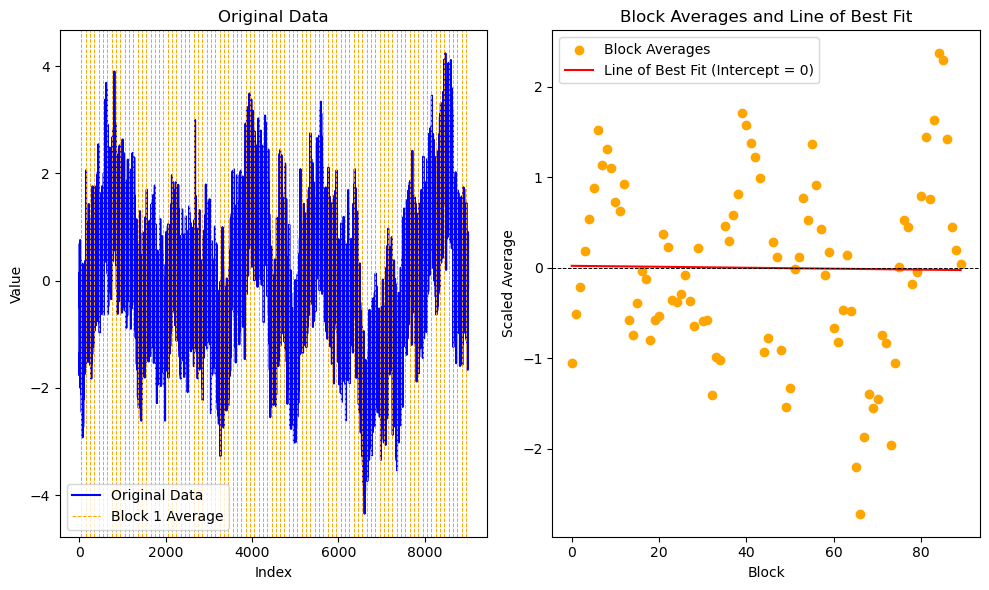

The slope of the data -0.0005256064412898556 is approximately zero: True
ID bc0b5b2f63475872d6a4f3a4d6fdead5 AT 6 T 140.0


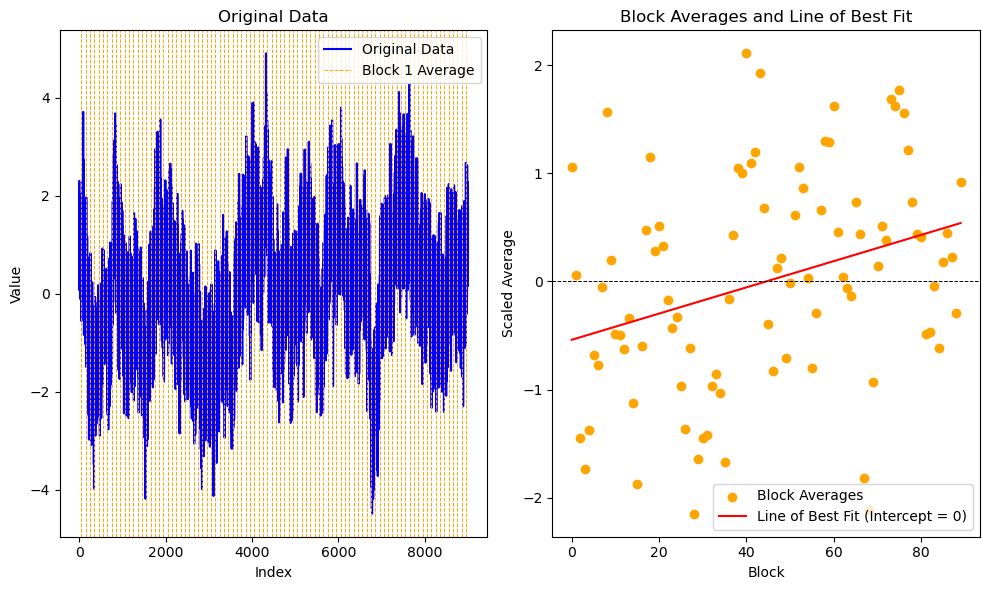

The slope of the data 0.0121183246342804 is approximately zero: True
ID b45ff7bbb0ab12e36a1a105d84855260 AT 1 T 170.0


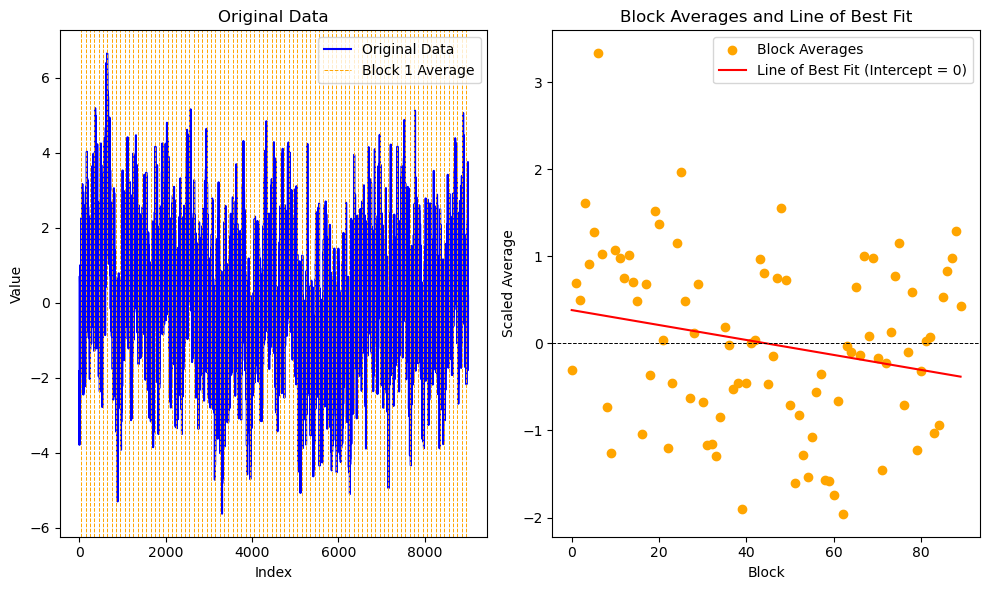

The slope of the data -0.008585456295101037 is approximately zero: True
ID a5e9151b388133e12717466e29b5c0c5 AT 8 T 150.0


In [ ]:
# Find all jobs with the specified statepoint value
mol_name = "R50"
project = signac.get_project("opt_ff_ms")
jobs = project.find_jobs({"mol_name": mol_name})# "T": float(sys.argv[3]), "atom_type": int(sys.argv[2])})

# Iterate over the matching jobs
for job in jobs:
    # Construct the command using the job ID and statepoint value
    print("ID", job.id, "AT", job.sp.atom_type, "T", job.sp.T)
    try:
        df_box1 = np.genfromtxt(job.fn("prod.out.box2.prp"))
        energy = df_box1[:, 2 - 1]

        
        slope, result = is_slope_zero(energy, 100)
        print(f"The slope of the data {slope} is approximately zero: {result}")
    except:
        pass